In [1]:
import pandas as pd

### Question - 1:
Create a dataframe with following data cleanup to make this file redable.

* Create a function load_data to read CSV file and convert CSV data to dataframe.
* Skip first row
* Rename column containing 01, 02 and 03 to Gold, Silver and Bronze
* Split country name and country code and add country name as data frame index
* Remove extra unnecessary characters from country name.
* Drop the column Totals
* Return dataframe.

In [2]:
def load_data():
    """
        Enter your code here
    """
    df=pd.read_csv('olympics.csv',skiprows=[0])
    df=df.rename(columns={'01 !' : 'Summer_Gold', '02 !' : 'Summer_Silver', '03 !' : 'Summer_Bronze',
                          '01 !.1' : 'Winter_Gold', '02 !.1' : 'Winter_Silver', '03 !.1' : 'Winter_Bronze',
                          '01 !.2' : 'Combined_Gold', '02 !.2' : 'Combined_Silver', '03 !.2' : 'Combined_Bronze'})
    df['country_name']=df['Unnamed: 0'].str.split('\(|\)',expand=True).astype(str)[0]
    df['country_name']=df['country_name'].str.strip()
    df['country_code']=df['Unnamed: 0'].str.split('\(|\)',expand=True).astype(str)[1]
    df=df.drop(['Unnamed: 0','Total'],axis=1)
    df=df.set_index('country_name')
    return df[:-1]

In [3]:
data=load_data()

In [4]:
data.tail()

,# Summer,Summer_Gold,Summer_Silver,Summer_Bronze,# Winter,Winter_Gold,Winter_Silver,Winter_Bronze,Total.1,# Games,Combined_Gold,Combined_Silver,Combined_Bronze,Combined total,country_code
country_name,,,,,,,,,,,,,,,
Yugoslavia,16,26,29,28,14,0,3,1,4,30,26,32,29,87,YUG
Independent Olympic Participants,1,0,1,2,0,0,0,0,0,1,0,1,2,3,IOP
Zambia,12,0,1,1,0,0,0,0,0,12,0,1,1,2,ZAM
Zimbabwe,12,3,4,1,1,0,0,0,0,13,3,4,1,8,ZIM
Mixed team,3,8,5,4,0,0,0,0,0,3,8,5,4,17,ZZX


### Question - 2:
Write a function to get first country details from dataframe we got from load_data function.

* Create a function first_country.
* Return results for first country.


In [5]:
def first_country(df):
    """
        Enter your code here
    """
    return df.index[0]


In [6]:
first_country(data)

'Afghanistan'

### Question - 3:
Which country has won the most gold medals in summer games?

* Create a function gold_medal to get name of country who won most gold medals.
* Return country name.


In [7]:
def gold_medal(df):
    """
        Enter your code here
    """
    return df['Summer_Gold'].idxmax()

In [8]:
gold_medal(data)

'United States'

### Question - 4:
Which country had the biggest difference between their summer and winter gold medal counts?

* Create a function biggest_difference_in_gold_medal to get name of country who has biggest difference between their summer and winter gold medal counts.
* Return country name

In [9]:
def biggest_difference_in_gold_medal(df):
    """
        Enter your code here
    """
    return (abs(df['Summer_Gold']-df['Winter_Gold'])).idxmax()

In [10]:
biggest_difference_in_gold_medal(data)

'United States'

### Question - 5:
Write a function to update the dataframe to include a new column called "Points" for Games which is a weighted value where each gold medal counts for 3 points, silver medals for 2 points, and bronze medals for 1 point. The function should return only the column (a Series object) which you created.

* Create a function get_points.
* Return dataframe with points column and index.

In [11]:
def get_points(df):
    """
    Enter your code here
    """
    df['Points']=df['Combined_Gold']*3+df['Combined_Silver']*2+df['Combined_Bronze']
    return df['Points']


In [12]:
get_points(data)

country_name
Afghanistan                            2
Algeria                               27
Argentina                            130
Armenia                               16
Australasia                           22
Australia                            923
Austria                              569
Azerbaijan                            43
Bahamas                               24
Bahrain                                1
Barbados                               1
Belarus                              154
Belgium                              276
Bermuda                                1
Bohemia                                5
Botswana                               2
Brazil                               184
British West Indies                    2
Bulgaria                             411
Burundi                                3
Cameroon                              12
Canada                               846
Chile                                 24
China                               1120
Col

### Question - 6
Write a function to perform k-means clustering for the given dataset.

* Create a fucntion k_means()
* Return Optimum value of k
* Cluster centers

In [13]:
def k_means(df,start=3,end=10): 
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import scale
    X=scale(df.drop(['country_code'],axis=1))
    from sklearn.metrics import  silhouette_score
    d={}
    c=[]
    for k in range(start,end):
        clusterer = KMeans(n_clusters=k, random_state=4)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels,sample_size=100,random_state=2)
        d[k]= silhouette_avg
        c.append(clusterer.cluster_centers_)
    centers=c[max(d, key=d.get)-start]
    k=max(d, key=d.get)
    return k,centers

In [14]:
k_means(data)

(3, array([[-0.16093086, -0.24322545, -0.26477315, -0.28220011, -0.23295643,
         -0.30738182, -0.30842223, -0.32355962, -0.31539716, -0.21702642,
         -0.26710477, -0.28826433, -0.30531217, -0.28727407, -0.28067561],
        [ 1.03507693,  1.17267689,  1.3674659 ,  1.53504493,  1.52678738,
          1.90600922,  1.89015568,  2.0359875 ,  1.95761522,  1.41185578,
          1.36099488,  1.54764085,  1.71452708,  1.53800677,  1.47825114],
        [ 1.8068343 ,  9.78144805,  9.0118044 ,  8.20860566,  2.10329431,
          4.72932562,  5.14682149,  4.44429678,  4.81836565,  2.14895072,
          9.42439793,  8.75203489,  7.91315875,  8.79968467,  9.03728239]]))

Here I find best k with __silhouette_score__ but as well in datascience that find best k not a good choice just 
to consider silhouette_score not enough its better to analysis on __elbow method__ and __gap statistics__ also to find best possible k value

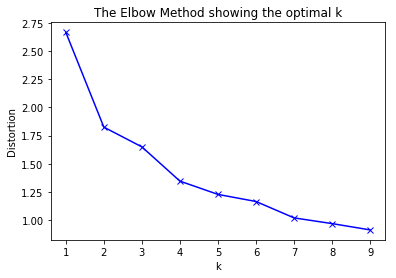

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
distortions=[]
X=scale(data.drop(['country_code'],axis=1))
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### From elbow method on cluter distance we get best k 4 so we have to analysis dta well and depend on 3-4 methods to decide best k value